# Project - Regression Modeling with the Ames Housing Dataset

## Introduction

In this lab, you'll apply the regression analysis and diagnostics techniques covered in this section to the "Ames Housing" dataset. You performed a detailed EDA for this dataset earlier on, and hopefully, you more or less recall how this data is structured! In this lab, you'll use some of the features in this dataset to create a linear model to predict the house price!

## Objectives
You will be able to:
* Perform a linear regression using statsmodels
* Determine if a particular set of data exhibits the assumptions of linear regression
* Evaluate a linear regression model by using statistical performance metrics pertaining to overall model and specific parameters
* Use the coefficient of determination to determine model performance
* Interpret the parameters of a simple linear regression model in relation to what they signify for specific data


## Let's get started

### Import necessary libraries and load 'ames.csv' as a pandas dataframe

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('seaborn')
ames = pd.read_csv('ames.csv')

subset = ['YrSold', 'MoSold', 'Fireplaces', 'TotRmsAbvGrd', 'GrLivArea',
          'FullBath', 'YearRemodAdd', 'YearBuilt', 'OverallCond', 'OverallQual', 'LotArea', 'SalePrice']

data = ames.loc[:, subset]

The columns in the Ames housing data represent the dependent and independent variables. We have taken a subset of all columns available to focus on feature interpretation rather than preprocessing steps. The dependent variable here is the sale price of a house `SalePrice`. The description of the other variables is available on [KAGGLE](https://www.kaggle.com/c/house-prices-advanced-regression-techniques). 

### Inspect the columns of the dataset and comment on type of variables present

In [2]:
# Your code here
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 12 columns):
YrSold          1460 non-null int64
MoSold          1460 non-null int64
Fireplaces      1460 non-null int64
TotRmsAbvGrd    1460 non-null int64
GrLivArea       1460 non-null int64
FullBath        1460 non-null int64
YearRemodAdd    1460 non-null int64
YearBuilt       1460 non-null int64
OverallCond     1460 non-null int64
OverallQual     1460 non-null int64
LotArea         1460 non-null int64
SalePrice       1460 non-null int64
dtypes: int64(12)
memory usage: 137.0 KB


In [11]:
# Record your observations here 
# there are 1460 entries, no missing values, and all columns are of type int, representing numbers
# the dataset also contains categorical values for things like year, etc.

### Create histograms for all variables in the dataset and comment on their shape (uniform or not?)

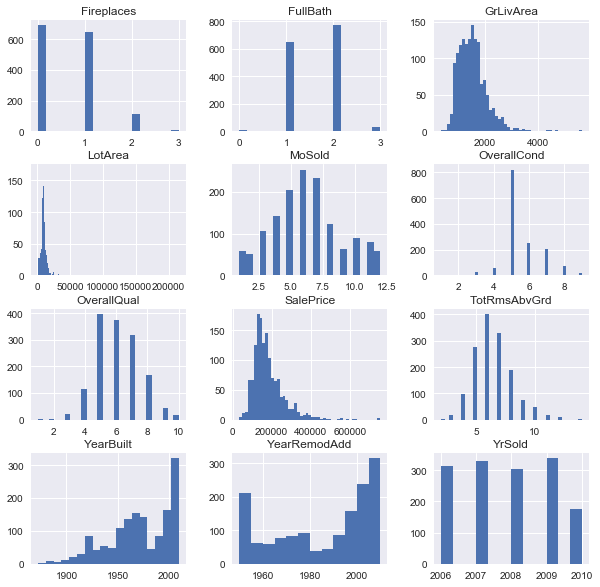

In [10]:
# Your code here 
data.hist(figsize=(10,10), bins='auto')
plt.show()

In [12]:
# You observations here 

LotArea, GrLivArea, and SalePrice all appear to be continuous, with log normal distributions.
Looking at YearBuilt, we can see that the number of houses has increased over time, with the majority of house purchases taking place in the 2000s

### Check the linearity assumption for all chosen features with target variable using scatter plots

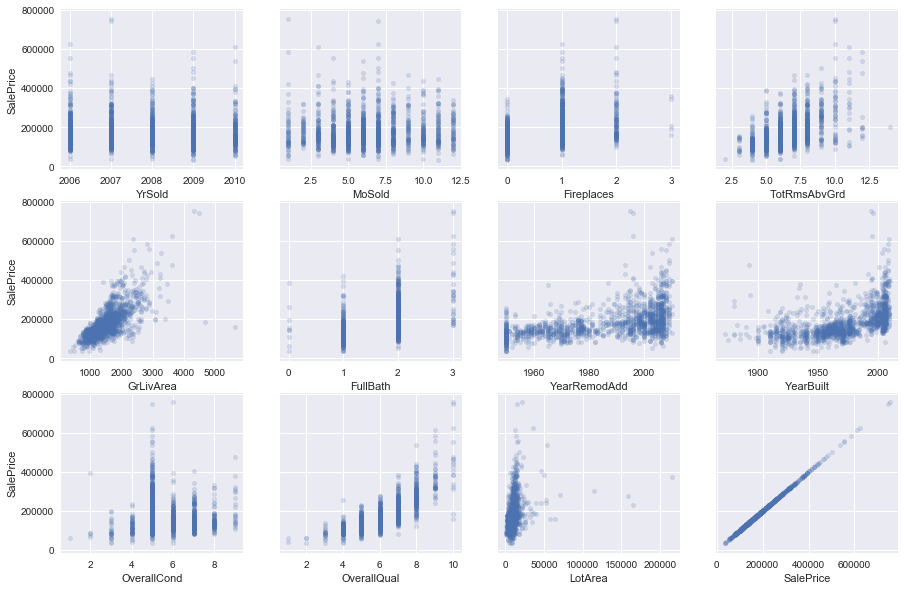

In [28]:
# Your code here 
fig, axes = plt.subplots(nrows=3, ncols=4, sharey=True, figsize=(15, 10))

for ax, column in zip(axes.flatten(), data.columns):
    data.plot(x=column, y='SalePrice', kind='scatter', ax=ax, alpha=0.2)

Clearly, your data needs a lot of preprocessing to improve the results. This key behind a Kaggle competition is to process the data in such a way that you can identify the relationships and make predictions in the best possible way. For now, we'll use the dataset untouched and just move on with the regression. The assumptions are not _exactly_ all fulfilled, but they still hold to a level that we can move on. 

### Let's do Regression 

Now, let's perform a number of simple regression experiments between the chosen independent variables and the dependent variable (price). You'll do this in a loop and in every iteration, you should pick one of the independent variables. Perform the following steps:

* Run a simple OLS regression between independent and dependent variables
* Plot the residuals using `sm.graphics.plot_regress_exog()`
* Plot a Q-Q plot for regression residuals normality test 
* Store following values in array for each iteration:
    * Independent Variable
    * r_squared'
    * intercept'
    * 'slope'
    * 'p-value'
    * 'normality (JB)' 
* Comment on each output 

Independent Variable: YrSold
R-Squared: 0.001
Independent Variable P-Value: 0.269
JB Normality: 3432.758


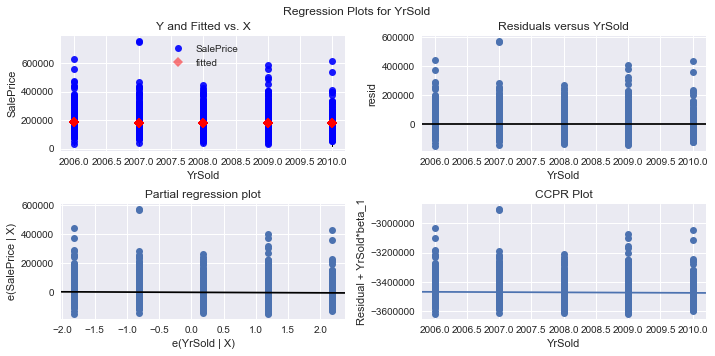

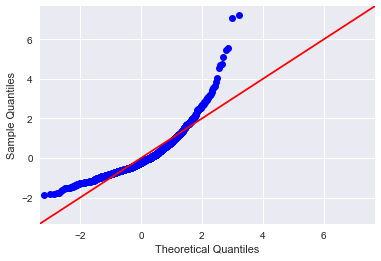

-------------------
Independent Variable: MoSold
R-Squared: 0.002
Independent Variable P-Value: 0.076
JB Normality: 3588.247


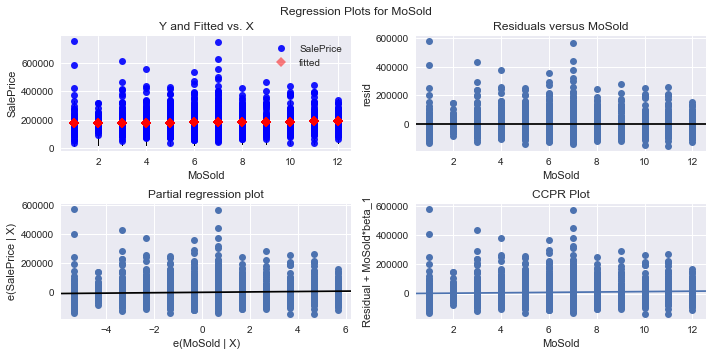

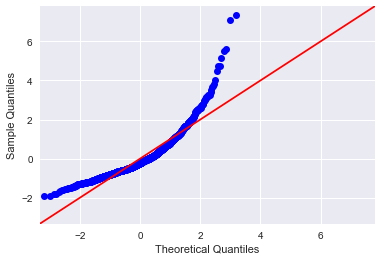

-------------------
Independent Variable: Fireplaces
R-Squared: 0.218
Independent Variable P-Value: 0.0
JB Normality: 3092.993


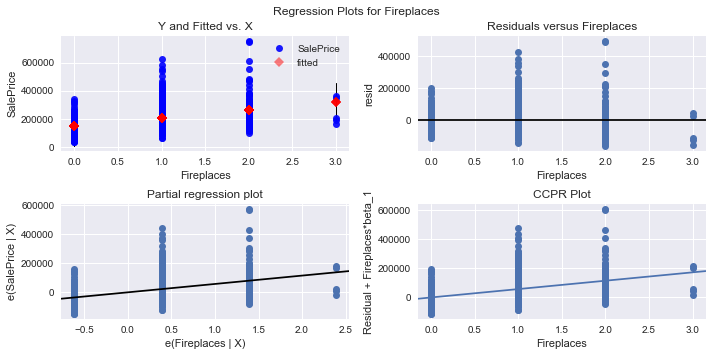

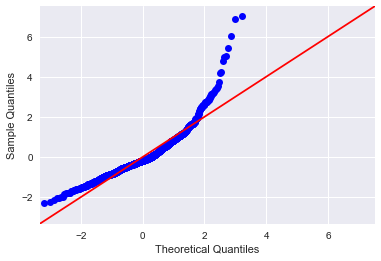

-------------------
Independent Variable: TotRmsAbvGrd
R-Squared: 0.285
Independent Variable P-Value: 0.0
JB Normality: 2240.44


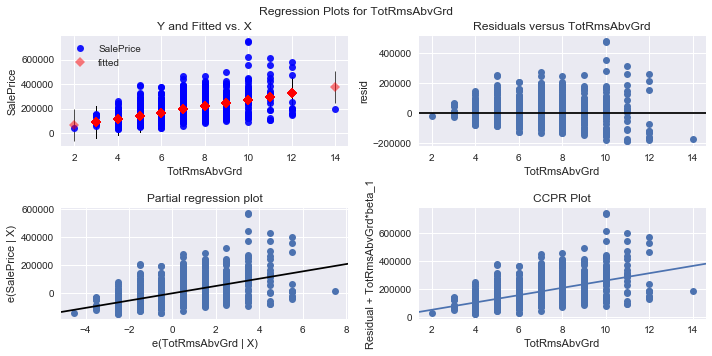

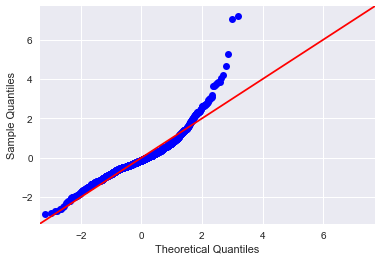

-------------------
Independent Variable: GrLivArea
R-Squared: 0.502
Independent Variable P-Value: 0.0
JB Normality: 3432.287


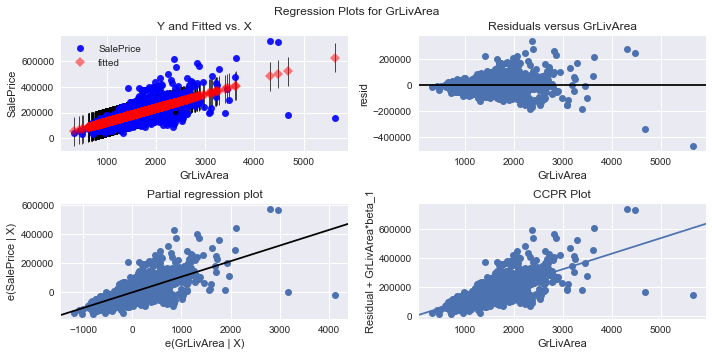

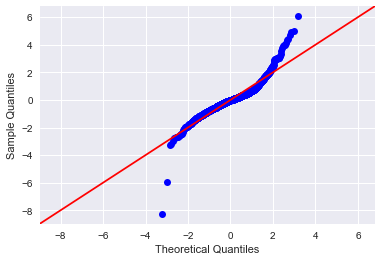

-------------------
Independent Variable: FullBath
R-Squared: 0.314
Independent Variable P-Value: 0.0
JB Normality: 3515.005


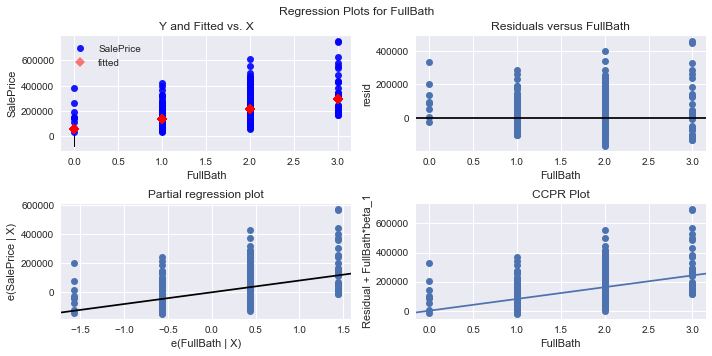

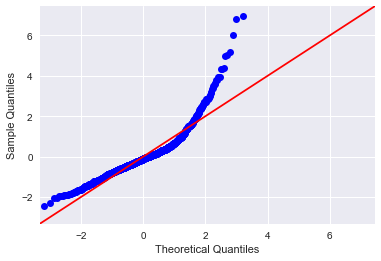

-------------------
Independent Variable: YearRemodAdd
R-Squared: 0.257
Independent Variable P-Value: 0.0
JB Normality: 5931.459


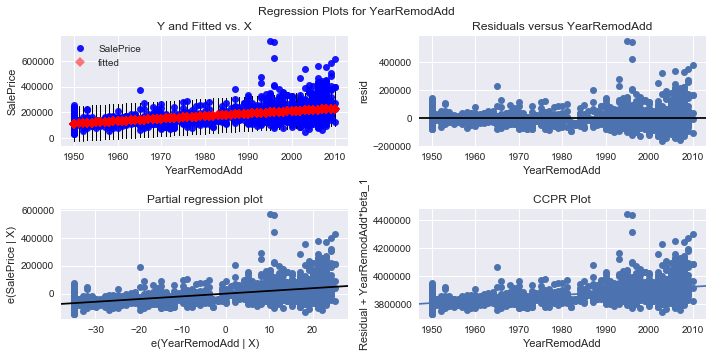

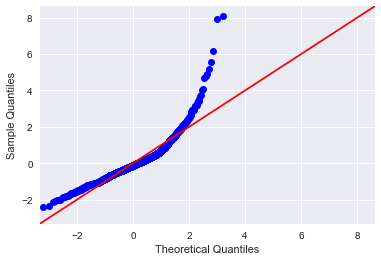

-------------------
Independent Variable: YearBuilt
R-Squared: 0.273
Independent Variable P-Value: 0.0
JB Normality: 6856.947


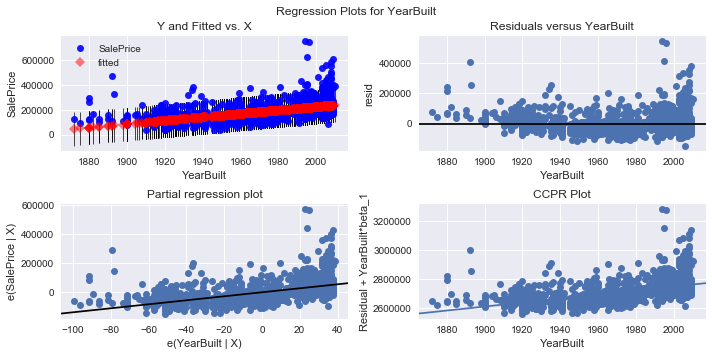

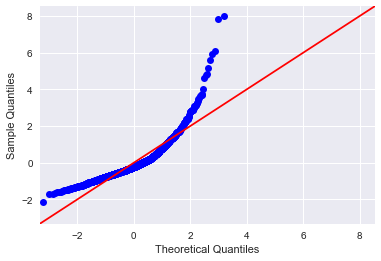

-------------------
Independent Variable: OverallCond
R-Squared: 0.006
Independent Variable P-Value: 0.003
JB Normality: 3406.241


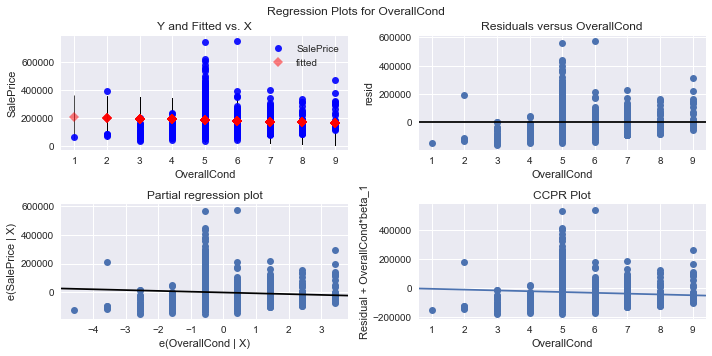

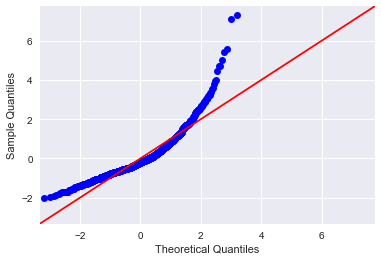

-------------------
Independent Variable: OverallQual
R-Squared: 0.626
Independent Variable P-Value: 0.0
JB Normality: 5872.098


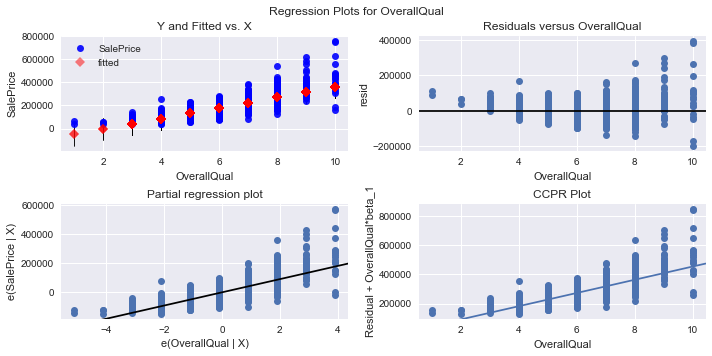

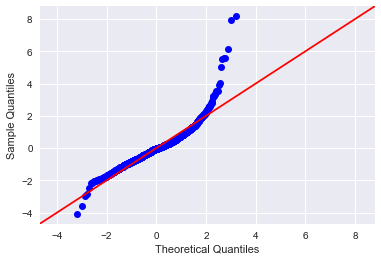

-------------------
Independent Variable: LotArea
R-Squared: 0.07
Independent Variable P-Value: 0.0
JB Normality: 3374.003


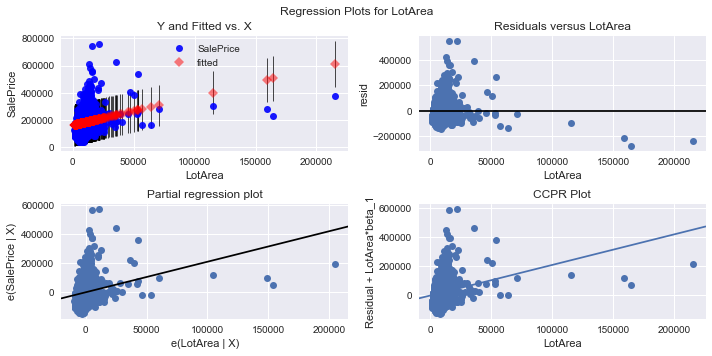

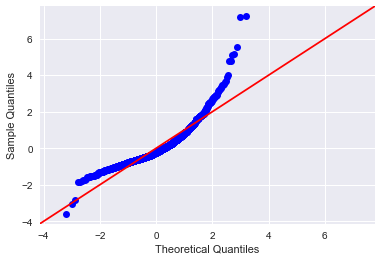

-------------------


In [75]:
# Your code here
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
import scipy.stats as stats

results = [] # array to store results

for col in data.columns[:-1]:
    formula = f'SalePrice ~ {col}'
    model = ols(formula=formula, data=data).fit()
    ind_variable = col
    r_squared = model.rsquared
    intercept = model.params[0]
    slope = model.params[1] 
    p_val = model.pvalues[1] # get the p-val of the slope variable, not the intercept
    jb = sms.jarque_bera(model.resid)[0]
    
    results.append([ind_variable, r_squared, intercept, slope, p_val, jb])
    
    # plot residuals
    print(f'Independent Variable: {ind_variable}')
    print(f'R-Squared: {round(r_squared, 3)}')
    print(f'Independent Variable P-Value: {round(p_val, 3)}')
    print(f'JB Normality: {round(jb, 3)}')
    
    fig = plt.figure(figsize=(10, 5))
    sm.graphics.plot_regress_exog(model, col, fig=fig)
    
    #QQ plot
    sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)
    
    #show results
    plt.show()
    print('-------------------')
    
    
    
    

Looking at the Q-Q plots for all variables, we can see that the normality assumption does not appear to be met. 
OverallQual appears to be the best predictor given the highest r-squared value of 0.626, followed closely by GrLivArea with an R-squared value of 

Clearly, the results are not very reliable. The best R-Squared is witnessed with `OverallQual`, so in this analysis, this is our best predictor. 

### How can you improve these results?
1. Preprocessing 

This is where the preprocessing of data comes in. Dealing with outliers, normalizing data, scaling values etc. can help regression analysis get more meaningful results from the given data. 

2. Advanced Analytical Methods

Simple regression is a very basic analysis technique and trying to fit a straight line solution to complex analytical questions may prove to be very inefficient. Later on, you'll explore multiple regression where you can use multiple features **at once** to define a relationship with the outcome. You'll also look at some preprocessing and data simplification techniques and revisit the Ames dataset with an improved toolkit. 

## Level up - Optional 

Apply some data wrangling skills that you have learned in the previous section to pre-process the set of independent variables we chose above. You can start off with outliers and think of a way to deal with them. See how it affects the goodness of fit. 

## Summary 

In this lab, you applied your skills learned so far on a new data set. You looked at the outcome of your analysis and realized that the data might need some preprocessing to see a clear improvement in the results. You'll pick this back up later on, after learning about more preprocessing techniques and advanced modeling techniques.